In [25]:
#"How Accurately Can We Predict Employee Attrition Based on Various Employee and Work-Related Factors?"

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [26]:
import os
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /Users/eman/Downloads


In [27]:
import os

downloads_directory = '/Users/eman/Downloads'

os.chdir(downloads_directory)


current_directory = os.getcwd()
print("Current working directory:", current_directory)


Current working directory: /Users/eman/Downloads


In [28]:
# import dataset
import pandas as pd

file_path = '/Users/eman/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)


In [29]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [31]:

# check data quality (missing values)
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [32]:
# print unique values in each feature

df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

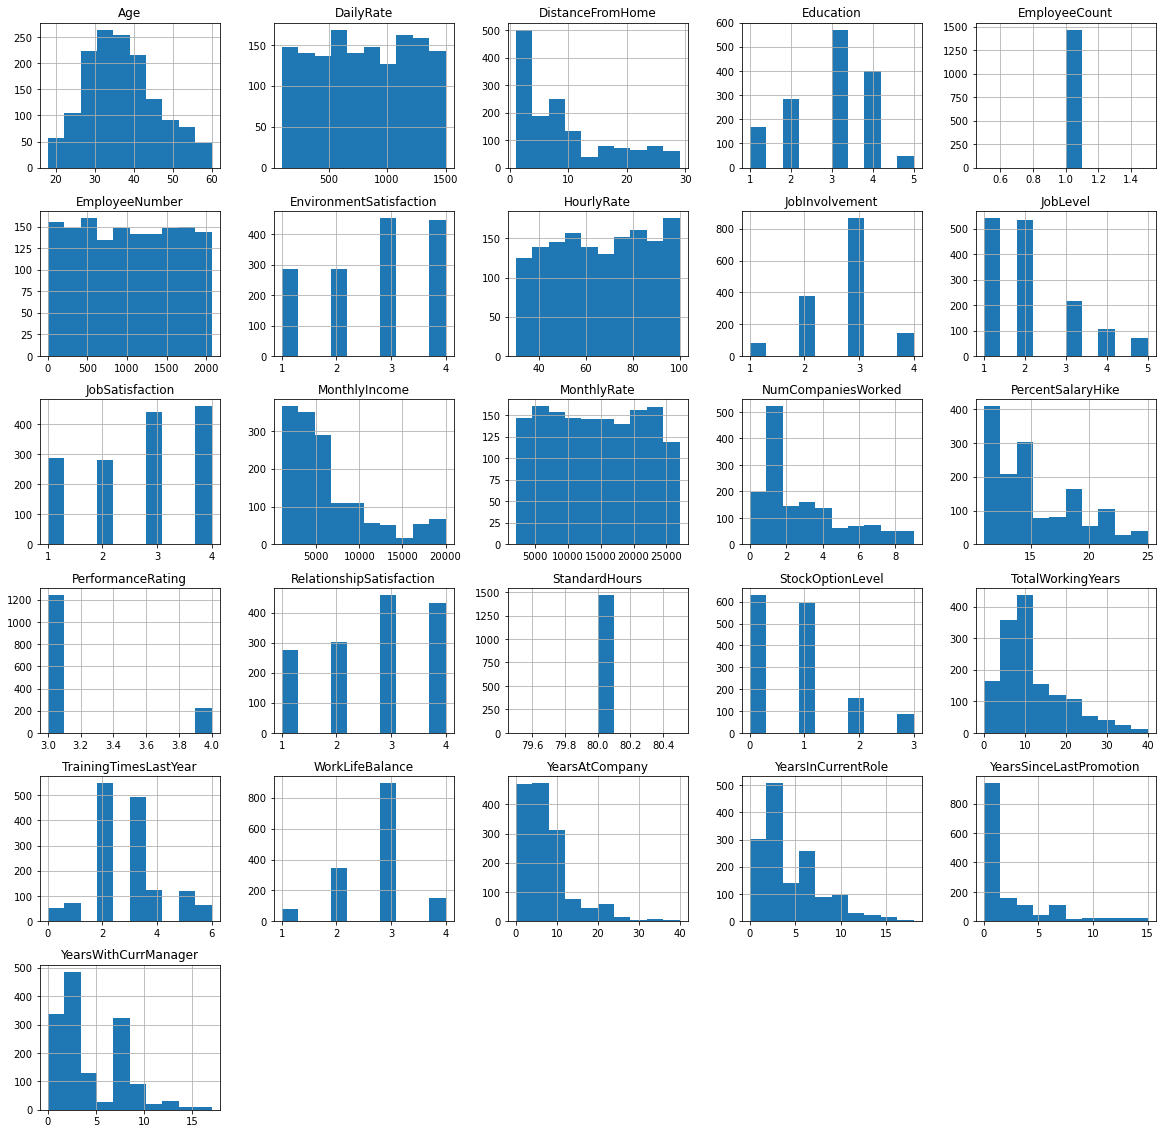

In [33]:
# Plot histogram for each numeric features

df.hist(figsize = (20,20))

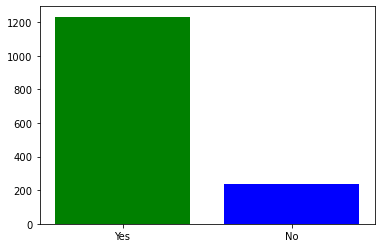

In [71]:
# Plot the distribution of "Attrition" values 

import matplotlib.pyplot as plt
 
plt.bar(df['Attrition'].unique(),df['Attrition'].value_counts(),color = ['green','blue']);


<Figure size 864x576 with 0 Axes>

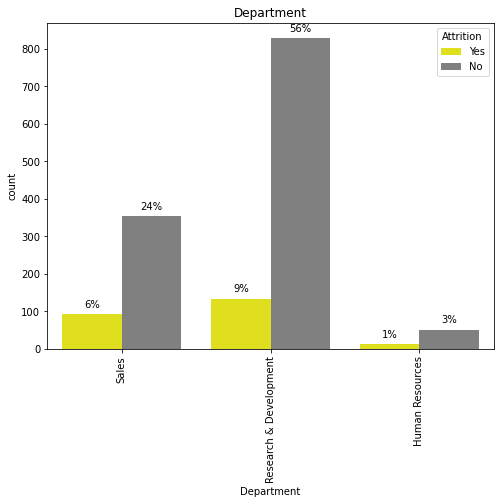

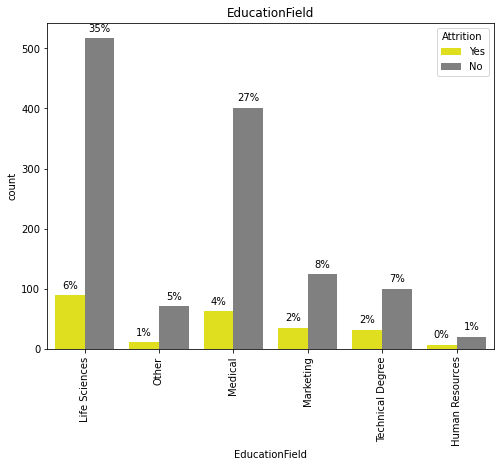

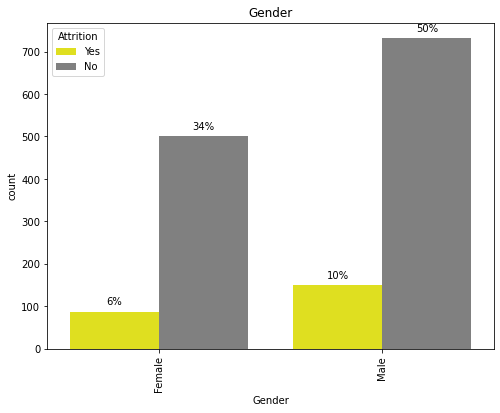

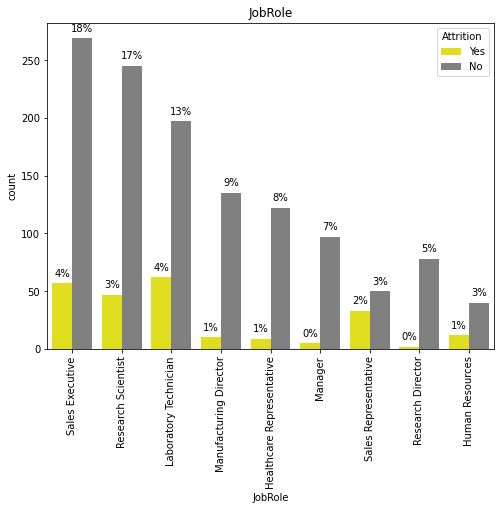

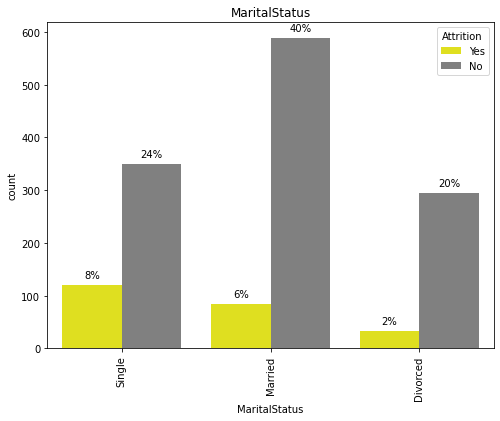

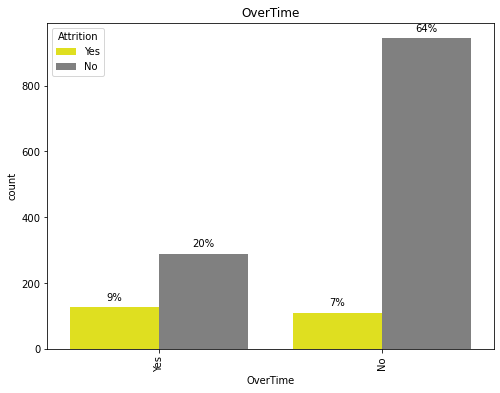

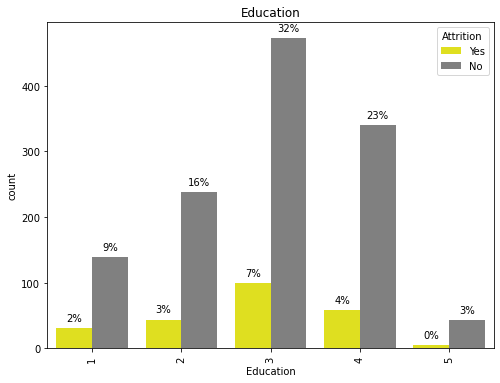

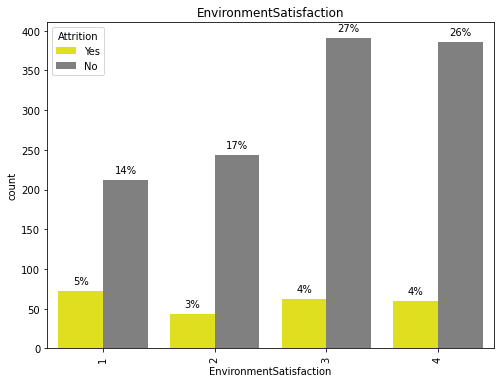

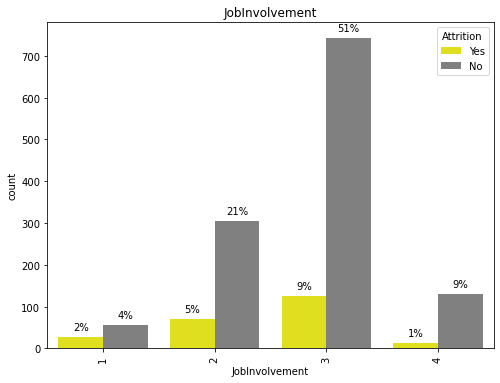

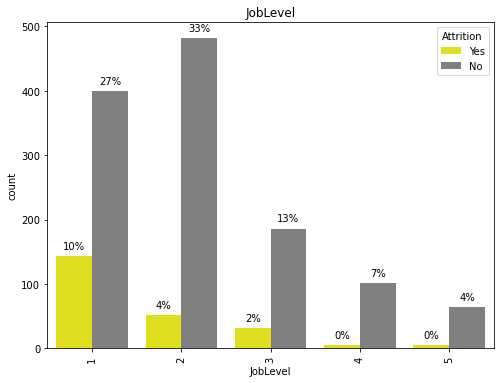

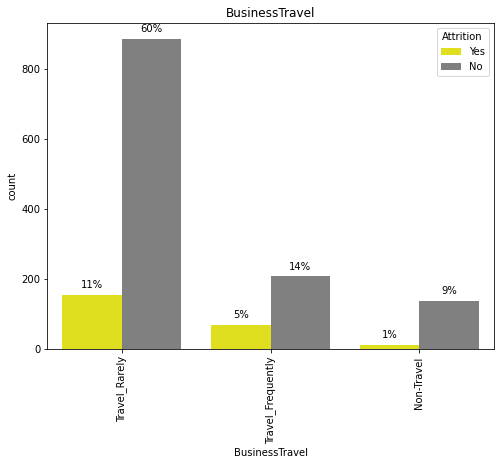

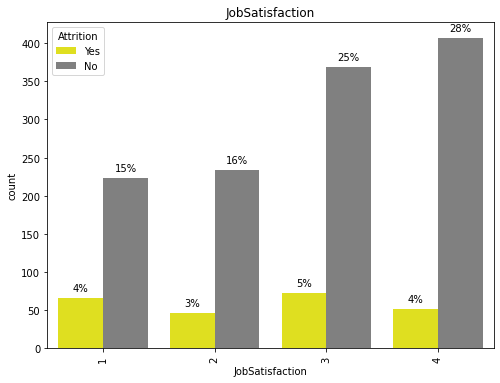

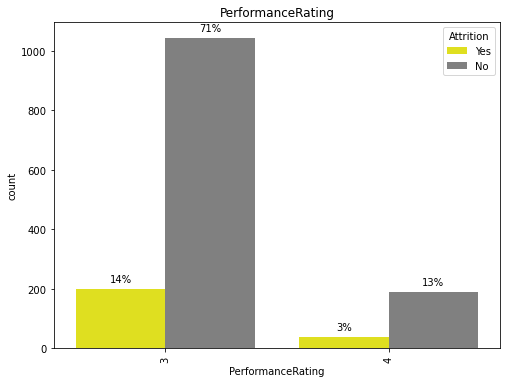

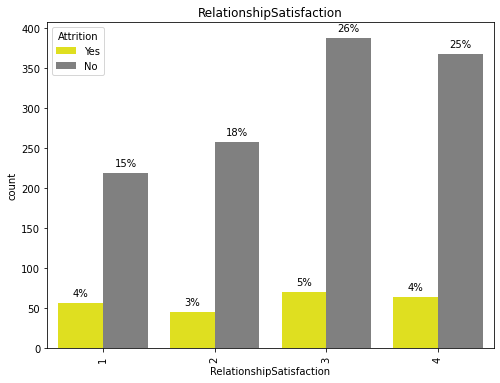

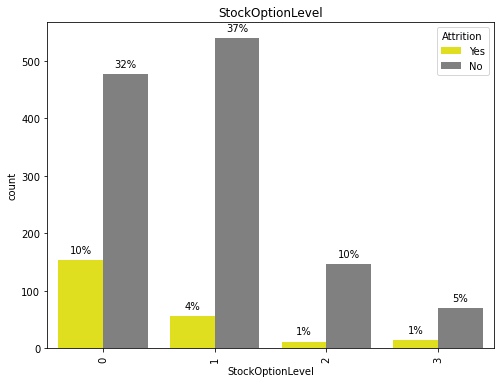

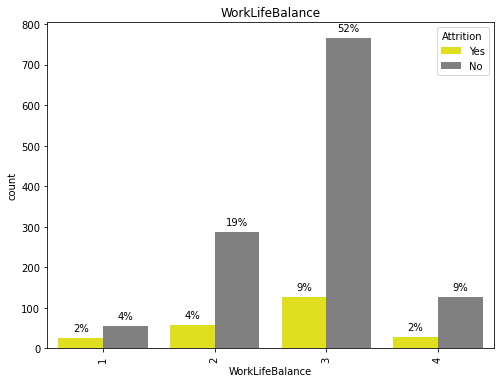

In [59]:
# Plot the Distribution of "Attrition" in Categorical and Ordinal Features by using loop function


import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime',
'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','BusinessTravel', 'JobSatisfaction', 
                'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']



plt.figure(figsize=(12, 8))

for feature in categorical_cols:
    fig, ax = plt.subplots(figsize=(8, 6)) 
    sns.countplot(x=feature, hue='Attrition', data=df, hue_order=['Yes', 'No'], palette=['yellow', 'gray'], ax=ax, linewidth=5)
    plt.title(feature)
    plt.xticks(rotation=90)

    # Calculate rounded percentages
    total_count = len(df[feature])
    for p in ax.patches:
        percentage = round(100 * p.get_height() / total_count)
        ax.annotate(f'{percentage}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

    plt.show()



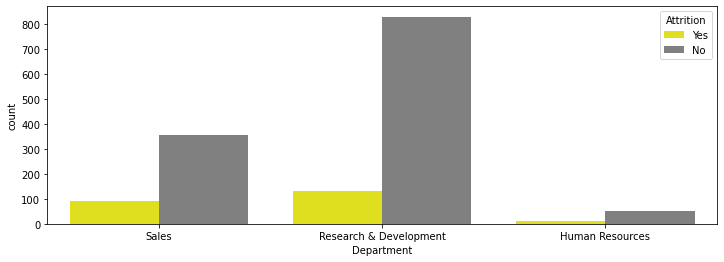

In [12]:
# Plot distribution of "Attrition" within different "Department" categories

plt.figure(figsize=(12,4))
sns.countplot(x='Department', hue='Attrition', data=df,hue_order=['Yes','No'],palette=['yellow','gray']);


In [61]:
# Features transformation
    
df2 = df.copy() 
    
df2.drop(['EmployeeCount','EmployeeNumber','DailyRate','StandardHours','Over18'], axis=1, inplace=True)
    
# convert from categorical to numeric varaible 
df2['Attrition'] = df2['Attrition'].map({'Yes':1, 'No':0})
df2['OverTime'] = df2['OverTime'].map({'Yes':1, 'No':0})
df2['BusinessTravel'] = df2['BusinessTravel'].map({'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0})

In [14]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [62]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder

from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier  

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

categorical_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','BusinessTravel', 'JobSatisfaction', 
                'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
numerical_cols = ['Age', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                  'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                  'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [63]:
# Create transformers for each type of feature
categorical_transformer = make_pipeline(
    OneHotEncoder(drop='first', sparse_output=False)  # Use drop='first' to handle multicollinearity
)

ordinal_transformer = make_pipeline(
    OrdinalEncoder()
)

numerical_transformer = make_pipeline(
    StandardScaler()
)

# Create a column transformer to apply the appropriate transformations to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ])



# Combine the preprocessing steps and logistic regression into a single pipeline
lr = make_pipeline(
    preprocessor,
    LogisticRegression(random_state=42)
)

# Combine the preprocessing steps and random forest into a single pipeline
rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42)
)

# Combine the preprocessing steps and decision tree into a single pipeline
dt = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=42)
)

# Combine the preprocessing steps and KNN into a single pipeline
knn = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

In [64]:
# Print each model accuracy using cross-validation to show their performance

pipelines = [lr, rf, dt, knn]

for pipe in pipelines:
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{pipe.steps[-1][1]}: {scores.mean():.4f} +/- {scores.std():.4f}')

LogisticRegression(random_state=42): 0.8684 +/- 0.0194
RandomForestClassifier(random_state=42): 0.8548 +/- 0.0092
DecisionTreeClassifier(random_state=42): 0.7767 +/- 0.0224
KNeighborsClassifier(): 0.8403 +/- 0.0054


In [65]:
#  Fit logoistic regression model
model_lr = lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
model_lr.score(X_test, y_test)

0.9021739130434783

In [66]:
#  Fit Random Forset model

model_rf = rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
model_rf.score(X_test, y_test)

0.8722826086956522

In [67]:
#  Fit KNN model
model_knn = knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
model_knn.score(X_test, y_test)

0.8668478260869565

In [68]:
# Fit and evaluate the Logistic Regression model with hyperparameter tuning

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder

from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score



categorical_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime','BusinessTravel']

ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

numerical_cols = ['Age', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                  'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                  'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# Create a column transformer to apply the appropriate transformations to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ])

lr_pipeline = make_pipeline(
    preprocessor,
    LogisticRegression(random_state=42 ,solver='lbfgs', max_iter=2000)
)



# Define hyperparameters for Logistic Regression


lr_param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],  
    'logisticregression__penalty': ['l1', 'l2']  
}


# Create a GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV for Logistic Regression
B = lr_grid_search.fit(X_train, y_train)
    

# Print the best parameters

best_params = B.best_params_

print(best_params)


# Get the best Logistic Regression model from GridSearchCV

best_lr_model = lr_grid_search.best_estimator_

best_lr_predictions = best_lr_model.predict(X_test)

best_lr_accuracy = accuracy_score(y_test, best_lr_predictions)

print(f'Best Logistic Regression Accuracy: {best_lr_accuracy}')


{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
Best Logistic Regression Accuracy: 0.907608695652174


In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix(y_test, best_lr_model.predict(X_test))


array([[318,   2],
       [ 32,  16]])

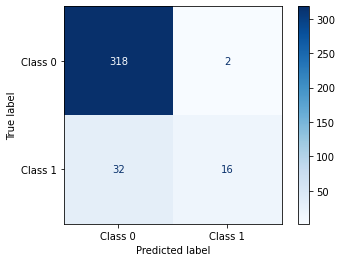

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have trained and fitted your best_lr_model previously
# Make predictions on the test data
y_pred = best_lr_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1']) 
disp.plot(cmap='Blues')
